In [57]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
sns.set(color_codes=True)

# Visualize result

### 1. Load results

In [58]:
feature_set = {'None': 'F-0', 
               'skipgram_ce_nm_ws_60_dim_100_epoch_1': 'F-SMF-1', 
               'skipgram_ce_nm_ws_180_dim_100_epoch_1': 'F-SMF-3',
               'skipgram_ce_nm_ws_360_dim_100_epoch_1': 'F-SMF-6',
               'RF': 'RF'}
los_set = {'95-percentile': 'G-2',
           '90-percentile': 'G-3',
           '30-percentile': 'G-5',
           '10-percentile': 'G-11',}
test_score_names = ['test_acc', 
                    'test_ami', 
                    'test_ari',] 

In [59]:
def rename_pretrained_path(x):
    if pd.isna(x):
        return feature_set['None']
    else:
        name = x.split('/')[-1].split('.')[0]
        return feature_set[name]

In [60]:
# get all result files of RF
result_dir = '../backup/result_RF_train_f1'
rf_result_paths = [join(result_dir, f) for f in listdir(result_dir)
                if isfile(join(result_dir, f)) and 'result_RF' in f]
# print('result_paths: ', result_paths)

# load to dataframe
rf_df = pd.concat([pd.read_csv(result_path) for result_path in rf_result_paths], ignore_index=True)

# rename
rf_df['model'] = ['RF'] * rf_df.shape[0]
rf_df['pretrained_path'] = ['RF'] * rf_df.shape[0]
rf_df['epoch'] = [1] * rf_df.shape[0]
rf_df['avg_loss'] = [None] * rf_df.shape[0]
print('shape: ', rf_df.shape)
print('columns: ', len(rf_df.columns))
rf_df.head()

shape:  (4, 13)
columns:  13


,los_group,test_acc,test_f1,test_precision,test_recall,train_acc,train_f1,train_precision,train_recall,model,pretrained_path,epoch,avg_loss
0,90-percentile,0.804850,0.745765,0.757696,0.804850,0.963261,0.962031,0.963592,0.963261,RF,RF,1,None
1,10-percentile,0.270488,0.226681,0.219170,0.270488,0.865718,0.863975,0.866452,0.865718,RF,RF,1,None
2,95-percentile,0.950726,0.000000,0.000000,0.000000,0.998722,0.985304,0.997413,0.973485,RF,RF,1,None
3,30-percentile,0.459673,0.438699,0.454140,0.459673,0.908404,0.908224,0.910929,0.908404,RF,RF,1,None


In [61]:
# get all result files of LSTM
result_dir = '../backup/result_LSTM_train_f1'
result_paths = [join(result_dir, f) for f in listdir(result_dir)
                if isfile(join(result_dir, f)) and 'result_' in f]

# load to dataframe
lstm_df = pd.concat([pd.read_csv(result_path) for result_path in result_paths], ignore_index=True)
lstm_df['pretrained_path'] = lstm_df['pretrained_path'].apply(rename_pretrained_path)
lstm_df['model'] = ['LSTM'] * lstm_df.shape[0]

print('shape: ', lstm_df.shape)
print('columns: ', len(lstm_df.columns))
lstm_df.head()

shape:  (83, 13)
columns:  13


,avg_loss,epoch,los_group,pretrained_path,test_acc,test_f1,test_precision,test_recall,train_acc,train_f1,train_precision,train_recall,model
0,1.309352,1,30-percentile,F-SMF-3,0.408676,0.362205,0.417837,0.408676,0.416599,0.379609,0.372947,0.416599,LSTM
1,1.259363,2,30-percentile,F-SMF-3,0.444999,0.374503,0.402648,0.444999,0.440575,0.404715,0.402927,0.440575,LSTM
2,1.243870,3,30-percentile,F-SMF-3,0.443278,0.396185,0.397775,0.443278,0.443288,0.413574,0.410112,0.443288,LSTM
3,1.217037,4,30-percentile,F-SMF-3,0.436392,0.401370,0.401527,0.436392,0.461544,0.431354,0.446553,0.461544,LSTM
4,1.199344,5,30-percentile,F-SMF-3,0.450508,0.413279,0.428713,0.450508,0.466603,0.439998,0.460204,0.466603,LSTM


In [62]:
# concat with RF
df = pd.concat([lstm_df, rf_df], ignore_index=True)

# rename
df['los_group'] = df['los_group'].apply(lambda x: los_set[x])
df['epoch'] = df['epoch'].apply(lambda x: str(x))
df['test_acc'] = df['test_acc'].apply(lambda x: x * 100)
df['train_acc'] = df['train_acc'].apply(lambda x: x * 100)
df['test_f1'] = df['test_f1'].apply(lambda x: x * 100)
df['train_f1'] = df['train_f1'].apply(lambda x: x * 100)
df['test_precision'] = df['test_precision'].apply(lambda x: x * 100)
df['test_recall'] = df['test_recall'].apply(lambda x: x * 100)
print('shape: ', df.shape)
print('columns: ', df.columns)
# df.head()

shape:  (87, 13)
columns:  Index(['avg_loss', 'epoch', 'los_group', 'model', 'pretrained_path',
       'test_acc', 'test_f1', 'test_precision', 'test_recall', 'train_acc',
       'train_f1', 'train_precision', 'train_recall'],
      dtype='object')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [63]:
df.groupby(['los_group', 'model', 'pretrained_path'])['test_f1'].max()

los_group  model  pretrained_path
G-11       LSTM   F-0                18.501400
                  F-SMF-1            18.059740
                  F-SMF-3            18.948294
                  F-SMF-6            19.298111
           RF     RF                 22.668082
G-2        LSTM   F-0                 3.592814
                  F-SMF-1             0.000000
                  F-SMF-3             0.000000
                  F-SMF-6             0.000000
           RF     RF                  0.000000
G-3        LSTM   F-0                81.969266
                  F-SMF-1            79.966856
                  F-SMF-3            80.199516
                  F-SMF-6            79.858419
           RF     RF                 74.576515
G-5        LSTM   F-0                41.621450
                  F-SMF-1            40.632131
                  F-SMF-3            41.708059
                  F-SMF-6            41.745137
           RF     RF                 43.869920
Name: test_f1, dtype: floa

In [64]:
# keep the max accuracy for each los_group, model, pretrained_path
def get_best_result(df, score_type='test_acc'):
    df = df.sort_values('epoch')
    max_accuracy_groups =  df.groupby(['los_group', 'model', 'pretrained_path'])[score_type].max()
    best_rows = list()
    for _, row in df.iterrows():
        if len(max_accuracy_groups) == 0:
            break
        for name in max_accuracy_groups.index:
            if row['los_group'] == name[0] and  row['model'] == name[1] \
                and row['pretrained_path'] == name[2] \
                and row[score_type] == max_accuracy_groups.loc[name]:
                best_rows.append(row)
                max_accuracy_groups.drop(name, inplace=True)
                break
    best_df = pd.DataFrame(best_rows)
    print('shape best_df:', best_df.shape)
    best_df.sort_values(['los_group', 'model', 'pretrained_path'], inplace=True)
    return best_df

In [65]:
# # append RF result
# for los_group in rf_acc_result.keys():
#     best_acc_df = best_acc_df.append({'los_group': los_group, 
#                         'pretrained_path': 'RF', 
#                         'test_acc': rf_acc_result[los_group]}, ignore_index=True)

In [66]:
best_acc_df = get_best_result(df, score_type='test_acc')
# best_acc_df.head(20)

shape best_df: (20, 13)


In [67]:
best_f1_df = get_best_result(df, score_type='test_f1')
best_f1_df.head(20)

shape best_df: (20, 13)


,avg_loss,epoch,los_group,model,pretrained_path,test_acc,test_f1,test_precision,test_recall,train_acc,train_f1,train_precision,train_recall
72,1.530240,4,G-11,LSTM,F-0,18.763987,18.501400,19.643145,18.763987,52.012611,51.590338,0.518788,0.520126
68,1.946037,7,G-11,LSTM,F-SMF-1,19.624720,18.059740,18.394881,19.624720,27.626659,25.972000,0.273272,0.276267
19,1.945667,7,G-11,LSTM,F-SMF-3,20.416595,18.948294,19.733849,20.416595,28.535816,26.692003,0.282144,0.285358
26,1.908310,7,G-11,LSTM,F-SMF-6,21.156826,19.298111,19.378858,21.156826,29.378987,27.508230,0.286739,0.293790
84,NaN,1,G-11,RF,RF,27.048755,22.668082,21.917029,27.048755,86.571810,86.397458,0.866452,0.865718
29,0.273250,3,G-2,LSTM,F-0,94.456877,3.592814,40.000000,1.880878,95.131608,7.777778,0.933333,0.040580
30,0.199632,1,G-2,LSTM,F-SMF-1,94.508521,0.000000,0.000000,0.000000,94.911650,0.287356,0.166667,0.001449
80,0.198821,1,G-2,LSTM,F-SMF-3,94.508521,0.000000,0.000000,0.000000,94.918982,0.000000,0.000000,0.000000
53,0.199686,1,G-2,LSTM,F-SMF-6,94.508521,0.000000,0.000000,0.000000,94.918982,0.000000,0.000000,0.000000
85,NaN,1,G-2,RF,RF,95.072614,0.000000,0.000000,0.000000,99.872165,98.530351,0.997413,0.973485


### 2.  Evaluate the effectiveness of Skip-MF

In [68]:
def visual_effective_skipmf(all_data, los_groups, score='test_acc', ylabel='', fname=None):
    # x: pretrained_path, y: accuracy, ami, ari
    
    nrows = 2
    ncols = int(len(los_groups)/2)
    f, axes = plt.subplots(nrows, ncols, figsize=(10, 8))
    plt.subplots_adjust(wspace=0.3, hspace=0.35)
    
    for index, los_group in enumerate(los_groups):
        # filter data
        data = []
        for record in all_data[(all_data.los_group == los_group)].to_dict('records'):
            pretrained_id = record['pretrained_path'].split('-')[-1]
            data.append((pretrained_id, record['pretrained_path'], record[score]))
        data.sort(key=lambda x: x[0])
        x_values = [x[1] for x in data]
        y_values = [x[2] for x in data]
        
        ax = axes[int(index / nrows), index % ncols]
        sns_plot = sns.lineplot(x=x_values, y=y_values, palette="tab10", ax=ax)
        ax.set_ylabel(ylabel)
        ax.set_xlabel('%s' % los_group)
        ax.set_xticklabels(x_values)

    if fname is not None:
        f.savefig(fname)

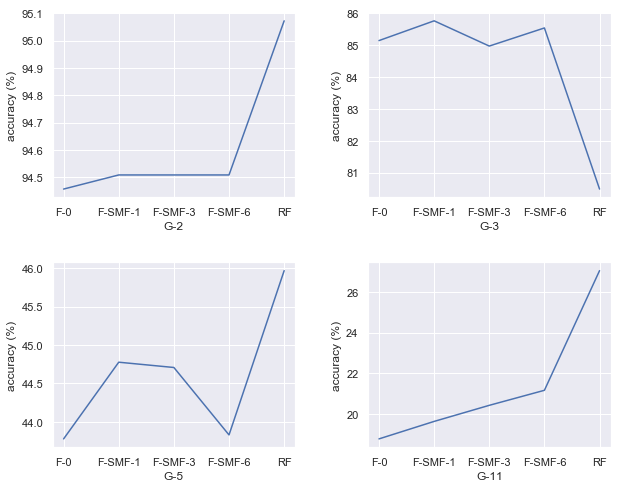

In [69]:
visual_effective_skipmf(best_f1_df, los_groups=los_set.values(), score='test_acc',
                        ylabel="accuracy (%)", fname='../backup/train_F1_effective_skipmf_acc_train.png')

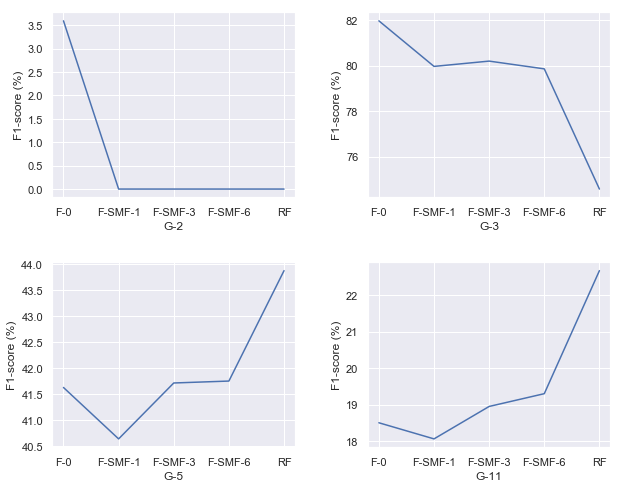

In [70]:
visual_effective_skipmf(best_f1_df, los_groups=los_set.values(), score='test_f1',
                        ylabel="F1-score (%)", fname='../backup/train_F1_effective_skipmf_f1.png')

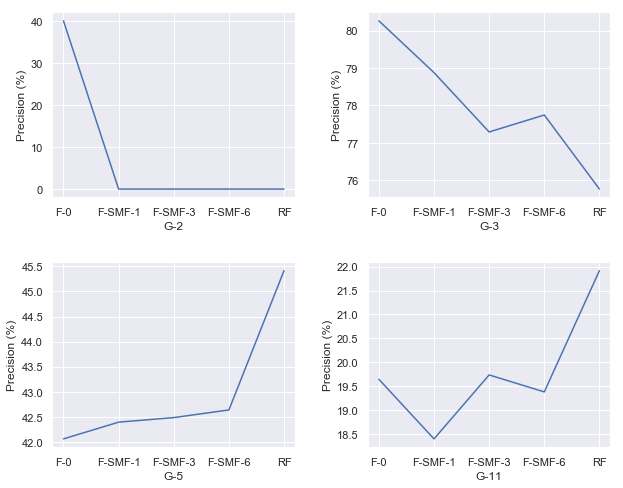

In [71]:
visual_effective_skipmf(best_f1_df, los_groups=los_set.values(), score='test_precision',
                        ylabel="Precision (%)", fname='../backup/train_F1_effective_skipmf_precision.png')

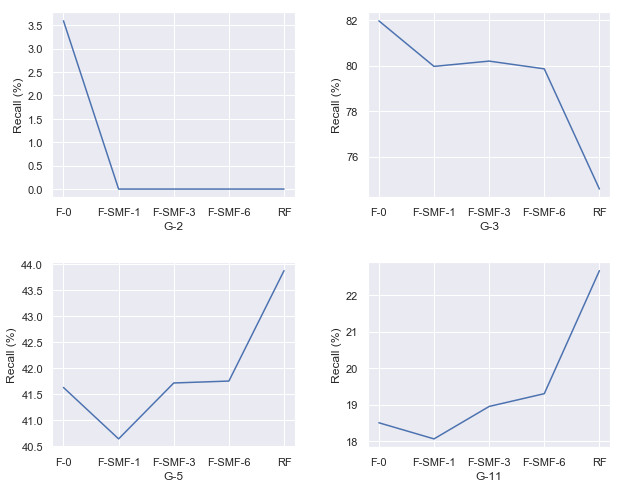

In [72]:
visual_effective_skipmf(best_f1_df, los_groups=los_set.values(), score='test_f1',
                        ylabel="Recall (%)", fname='../backup/train_F1_effective_skipmf_recall.png')

### 3. Evaluate the effectiveness of different LOS groups
- x : los_group, y: scores

In [73]:
def visual_effective_los_groups(all_data, pretrained_paths, score='test_acc', xlabel=None, ylabel='', fname=None):
    # x : los_group, y: scores (accuracy, ami, ari)
    
    los_group_values = [int(g.split('-')[1]) for g in los_set.values()]
    
    # filter data
    list_data = []
    for index, row in all_data.iterrows():
        list_data.append({'los_group': int(row['los_group'].split('-')[1]),
                          row['pretrained_path']: row['test_acc']})
    data = pd.DataFrame(list_data)
    data.sort_values('los_group', inplace=True)
    data.set_index('los_group', inplace=True)
#     print(data)
    
    sns_plot = sns.lineplot(data=data, palette="tab10", markers=True)
    sns_plot.set_ylabel(ylabel)
    if xlabel is not None:
        sns_plot.set_xlabel(xlabel)
    sns_plot.set_xticks(sorted(los_group_values))
    
    f = sns_plot.get_figure()
    f.set_figure((12,12))
    f.show()

    if fname is not None:
        f.savefig(fname)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


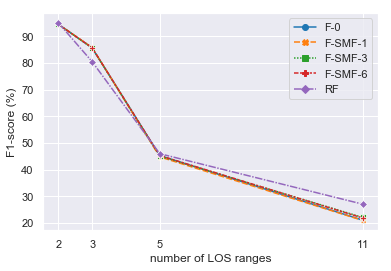

In [74]:
visual_effective_los_groups(best_acc_df, pretrained_paths=feature_set.values(), score='test_f1',
                            xlabel = 'number of LOS ranges', ylabel='F1-score (%)',
                            fname='../backup/train_F1_effective_los_groups.png')

## 4.  Evaluate the effectiveness of different window size

In [75]:
def visual_effective_window_size(all_data, score='test_acc', ylabel='', fname=None):
    # x : window size, y: scores (accuracy, ami, ari)
    
    # filter data
    window_sizes = {'F-SMF-1': 60,
                    'F-SMF-3': 180,
                    'F-SMF-6': 360}
    list_data = []
    for index, row in all_data.iterrows():
        if row['pretrained_path'] in window_sizes:
            list_data.append({'window size': window_sizes[row['pretrained_path']],
                              row['los_group']: row[score]})
    data = pd.DataFrame(list_data)
    data.sort_values('window size', inplace=True)
    data.set_index('window size', inplace=True)
#     print(data)
    
    sns_plot = sns.lineplot(data=data, palette="tab10", markers=True)
    sns_plot.set_ylabel(ylabel)
    sns_plot.set_xticks(sorted(window_sizes.values()))

    
    f = sns_plot.get_figure()
    f.set_figure((12,12))
    f.show()

    if fname is not None:
        f.savefig(fname)

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


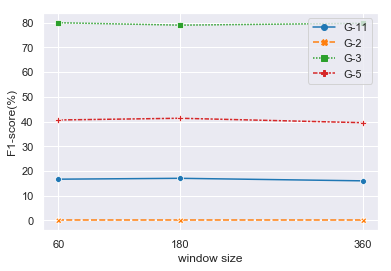

In [76]:
visual_effective_window_size(best_acc_df, score='test_f1', ylabel='F1-score(%)',
                            fname='../backup/effective_window_size_f1.png')

### *.Evaluate scores over epoch

In [180]:
# columns = ['epoch']
# columns.extend(test_score_names)
# # select epoch having max accuracy
# data = df[(df.pretrained_path == 'F-0') & (df.los_group == 'G-5')][columns]
# data.set_index('epoch', inplace=True)
# data.sort_index(inplace=True)

# plt.subplots(figsize=(8, 5))
# sns_plot = sns.lineplot(data=data, palette="tab10")
# fig = sns_plot.get_figure()
# fig.show()